## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 7*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


7. Sobre la imagen microscope.png, aplicar los siguientes pasos:
- Binarizar la imagen (si no está binarizada).
- Obtener la componente conexa de menor tamaño. ¿Cuántos píxeles tiene?
- Recortar la componente conexa de mayor tamaño, y remover el resto de componentes. Mostrar una imagen binaria donde solo quede la mayor componente conexa.
- Aplicar operaciones morfológicas para contar cuántas hay células en total. ¿Comparar el número obtenido contra el número verdadero de células?

-------

#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### *Binarización de imagen*

En este caso, la imagen ya está binarizada (está en blanco y negro). Sin embargo, se utilizará un algoritmo de binarización para asegurarse que los pixeles sean negro o blanco. 

In [2]:
# Importar imagen en escala de grises
img = cv2.imread('img/microscope.png', cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen con Otsu
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

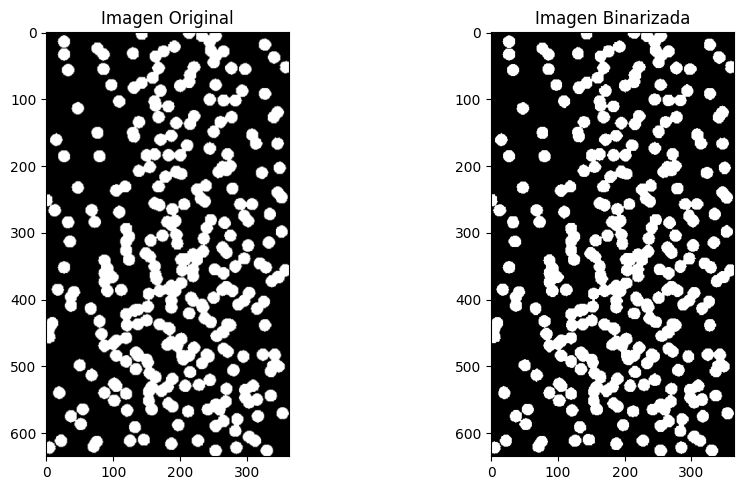

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(img_bin, cmap='gray')
plt.title('Imagen Binarizada')

plt.tight_layout()

plt.show()

#### *Componente Conexo (de menor tamaño)*

Posteriormente, se utiliza la función cv2.connectedComponentsWithStats para detectar todos los componentes conexos de la imágen.

In [4]:
# Identificación de componentes conexos
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_bin, connectivity=8)

A partir de eso, se debe encontrar cuál es el componente conexo de menor tamaño (excluyendo el fondo negro de la imágen). Para esto, se utiliza una función que permite ordenar los componentes según su área. 

In [5]:
# Encontrar el componente conexo de menor tamaño (excluyendo el fondo)
min_component_index = np.argmin(stats[1:, cv2.CC_STAT_AREA]) + 1

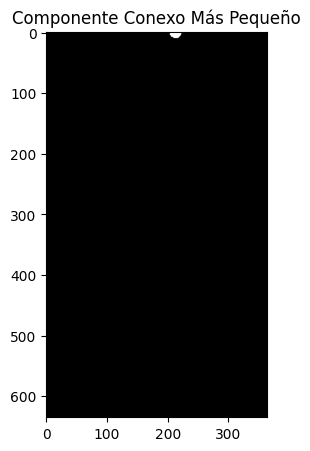

In [6]:
# Extrae la máscara del componente conexo más pequeño
min_component = (labels == min_component_index).astype(np.uint8) * 255

# Mostrar la imagen del componente conexo más pequeño
plt.figure(figsize=(5, 5))
plt.imshow(min_component, cmap='gray')
plt.title('Componente Conexo Más Pequeño')
plt.show()

Finalmente, se realizó el calculo correspondiente para determinar cuántos pixeles tiene el componente de menor tamaño. En este caso, lo que se está calculando es la cantidad de pixeles blancos.

In [7]:
# Calculo de cuántos pixeles blancos tiene el componente conexo más pequeño
count = 0
for i in range(min_component.shape[0]):
    for j in range(min_component.shape[1]):
        if min_component[i][j] == 255:
            count += 1

print(f"El componente conexo más pequeño tiene {count} píxeles blancos.")

El componente conexo más pequeño tiene 158 píxeles blancos.


#### *Componente Conexo (de mayor tamaño)*

Luego, se repitió el procedimiento anterior para encontrar el componente conexo de mayor tamaño.

In [8]:
# Encontrar el componente conexo de mayor
max_component_index = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

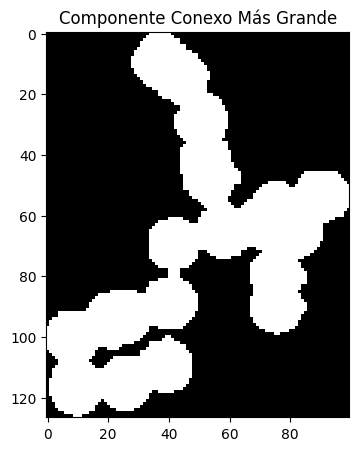

In [9]:
# Extrae la máscara del componente conexo más grande
max_component = (labels == max_component_index).astype(np.uint8) * 255

# Recortar la imagen para mostrar solo el componente conexo más grande
x, y, w, h, area = stats[max_component_index]
max_component = max_component[y:y+h, x:x+w]

# Mostrar la imagen del componente conexo más grande
plt.figure(figsize=(5, 5))
plt.imshow(max_component, cmap='gray')
plt.title('Componente Conexo Más Grande')
plt.show()

#### *Operaciones morofológicas*

Finalmente, se aplicaron operaciones morfológicas para contar cuántas células hay en total.

- **De lo que puedo contar, hay 19 células**

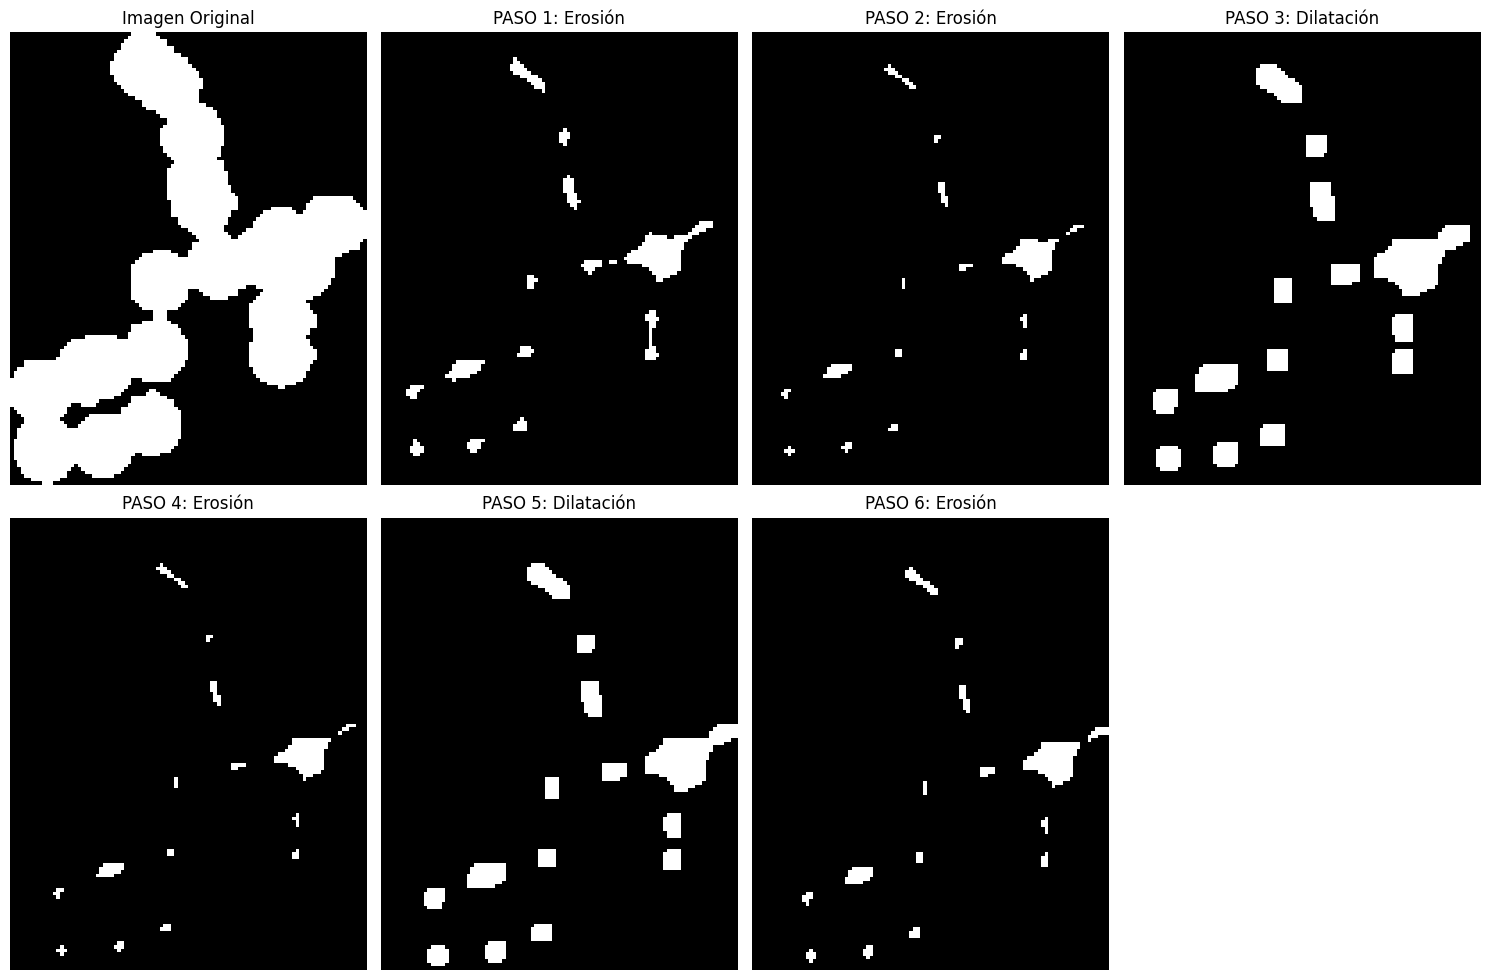

In [10]:
plt.figure(figsize=(15, 10))

# Imagen original
plt.subplot(2, 4, 1)
plt.imshow(max_component, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# ---------------------------- OPERACIONES MORFOLÓGICAS 

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
cells = cv2.erode(max_component, kernel, iterations=1)

plt.subplot(2, 4, 2)
plt.imshow(cells, cmap='gray')
plt.title('PASO 1: Erosión')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
cells = cv2.erode(cells, kernel, iterations=1)

plt.subplot(2, 4, 3)
plt.imshow(cells, cmap='gray')
plt.title('PASO 2: Erosión')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
cells = cv2.dilate(cells, kernel, iterations=4)

plt.subplot(2, 4, 4)
plt.imshow(cells, cmap='gray')
plt.title('PASO 3: Dilatación')
plt.axis('off')

# ----------------------------

kernel = np.array([ [1, 1],
                    [1, 1]], dtype=np.uint8)
cells = cv2.erode(cells, kernel, iterations=4)

plt.subplot(2, 4, 5)
plt.imshow(cells, cmap='gray')
plt.title('PASO 4: Erosión')
plt.axis('off')

# ----------------------------

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
cells = cv2.dilate(cells, kernel, iterations=3)

plt.subplot(2, 4, 6)
plt.imshow(cells, cmap='gray')
plt.title('PASO 5: Dilatación')
plt.axis('off')

# ----------------------------

kernel = np.array([ [1, 1, 1, 1],
                    [1, 1, 1, 1],
                    [1, 1, 1, 1]], dtype=np.uint8)
cells = cv2.erode(cells, kernel, iterations=1)

plt.subplot(2, 4, 7)
plt.imshow(cells, cmap='gray')
plt.title('PASO 6: Erosión')
plt.axis('off')

# ----------------------------


plt.tight_layout()